<a href="https://colab.research.google.com/github/aka-ish/Machine-Learning-Notes/blob/main/session_20_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

DATA DESCRIPTION
```
file name -> Columns
quater-i.csv -> ['order_id', 'quantity', 'item_id', 'choice_description_id' 'item_price']
items.csv -> ['item_id', 'item_name']
```
Dataset Link - https://drive.google.com/drive/folders/1Z0kaFybvgFeczeUj4dldUnhTdloLqLsL?usp=share_link

In [ ]:
# import like this
items =pd.read_csv('/content/items.csv')
q1 = pd.read_csv('/content/quarter-1.csv')
q2 = pd.read_csv('/content/quarter-2.csv')
q3 = pd.read_csv('/content/quarter-3.csv')


In [ ]:
items.head()

,item_id,item_name
0,0,Chips and Fresh Tomato Salsa
1,1,Izze
2,2,Nantucket Nectar
3,3,Chips and Tomatillo-Green Chili Salsa
4,4,Chicken Bowl


###`Q:1-5`
1. You are given three quater files, your job is to append these three files and make a single dataframe.
2. Have a index as Q-1 Q-2 Q-3 for respective quater files in the dataframe
3. Your are given a file items.csv which has item_id and item_name. Find out most sold items in each quarter.
4. Find out items which has made most revenue in each quarter.
5. Find out avg order price of each quarter.

***Note: item_price is given as str with $ sign, in earlier task you have converted this to rupees, here too first convert item_price field in rupees.***

In [ ]:
#Q1 and Q2
quarters = pd.concat([q1,q2,q3], keys= ['q1','q2','q3'])

In [ ]:
quarters.reset_index()

,level_0,level_1,order_id,quantity,item_id,choice_description_id,item_price
0,q1,0,1,1,1,1,$3.39
1,q1,1,1,1,2,2,$3.39
2,q1,2,2,2,4,3,$16.98
3,q1,3,4,1,7,6,$9.25
4,q1,4,6,1,9,8,$8.75
...,...,...,...,...,...,...,...
4617,q2,2342,1829,1,23,92,$11.25
4618,q2,2343,1830,1,23,1043,$11.25
4619,q2,2344,1832,1,10,116,$8.75
4620,q2,2345,1832,1,8,0,$4.45


In [ ]:
df = quarters.reset_index().merge(items,on='item_id')
df.rename(columns={"level_0": "quarter"}, inplace=True)
df.tail()
df.groupby(['quarter','item_name'])['quantity'].sum().reset_index().sort_values('quantity',ascending=False).drop_duplicates(subset='quarter',keep='first')

,quarter,item_name,quantity
65,q2,Chicken Bowl,394
17,q1,Chicken Bowl,367


In [ ]:
# 4. Find out items which has made most revenue in each quarter.
df['item_price'] = df['item_price'].apply(lambda x: float(x[1:]))
df['total_item_price'] = df['item_price'] * df['quantity']
df.groupby(['quarter','item_name'], as_index=False)['total_item_price'].sum().sort_values('total_item_price',ascending=False).drop_duplicates('quarter',keep='first')

,quarter,item_name,total_item_price
65,q2,Chicken Bowl,4192.25
17,q1,Chicken Bowl,3852.38


In [ ]:
# 5.Find out avg order price of each quarter
df.groupby(['quarter','order_id'], as_index=False)['total_item_price'].sum().groupby('quarter',as_index=False)['total_item_price'].mean()

,quarter,total_item_price
0,q1,13.809488
1,q2,13.279828


###`Q-6` From the IPL wala dataset you have to find the Purple cap holder each season.

*Note: Bowler with most no wickets in a season gets purple cap. If more than one bowler have same no of wickets in the season, one with least ecomnomy among them is purple cap holder.*

Bowler's Economy = runs-conceded per six balls

In [ ]:
# code here
balls = pd.read_csv('/content/ipl_ball_by_ball_2008_2022.csv')
matches = pd.read_csv('/content/ipl_matches_2008_2022.csv')
balls.head()

,id,innings,overs,ball_number,batter,bowler,non_striker,extra_type,batsman_run,extras_run,total_run,non_boundary,iswicket_delivery,player_out,dismisal_kind,fielders_involved,batting_team
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [ ]:
matches.head()

,id,city,match_date,season,match_number,team1,team2,venue,toss_winner,toss_decision,superover,winning_team,won_by,margin,method,player_of_match,umpire1,umpire2
0,1312200,Ahmedabad,29-05-2022,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,27-05-2022,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,CB Gaffaney,Nitin Menon
2,1312198,Kolkata,25-05-2022,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,J Madanagopal,MA Gough
3,1312197,Kolkata,24-05-2022,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,BNJ Oxenford,VK Sharma
4,1304116,Mumbai,22-05-2022,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,AK Chaudhary,NA Patwardhan


In [82]:
season_df = balls.merge(matches[['id','season']],on='id')
season_df['IsBowlerWicket'] = season_df['dismisal_kind'].apply(lambda x: 1 if x in ['caught','caught and bowled', 'bowled', 'stumped','lbw','hit wicket'] else 0)
season_df['BowlerRun'] = season_df.extra_type.apply(lambda x: 0 if x in ["legbyes",'byes'] else 1) * season_df['total_run']
season_df['IsLegalBall'] = season_df.extra_type.apply(lambda x: 0 if x in ['wides','noballs'] else 1)
pcapdf = season_df.groupby(["season","bowler"], as_index=False)[['IsBowlerWicket','BowlerRun','IsLegalBall']].sum()
pcapdf['Economy'] = pcapdf['BowlerRun'] / pcapdf['IsLegalBall'] * 6
pcapdf.sort_values(['IsBowlerWicket','Economy'], ascending=[False,True]).drop_duplicates("season", keep = "first").sort_values("season")

,season,bowler,IsBowlerWicket,BowlerRun,IsLegalBall,Economy
84,2007/08,Sohail Tanvir,22,266,247,6.461538
174,2009,RP Singh,23,417,358,6.988827
284,2009/10,PP Ojha,21,429,353,7.291785
447,2011,SL Malinga,28,375,378,5.952381
537,2012,M Morkel,25,453,378,7.190476
629,2013,DJ Bravo,32,497,375,7.952000
779,2014,MM Sharma,23,452,323,8.396285
847,2015,DJ Bravo,26,426,314,8.140127
938,2016,B Kumar,23,490,396,7.424242
1048,2017,B Kumar,26,369,314,7.050955


In [79]:
season_df['dismisal_kind'].value_counts()

,count
dismisal_kind,
caught,6837
bowled,1944
run out,1007
lbw,685
stumped,325
caught and bowled,323
hit wicket,14
retired hurt,13
obstructing the field,2


###`Q-7:` Best bowler in death overs.
*Note: Have taken most no of wickets in case of tie with least economy*

Death Overs - [16-20]

In [88]:
death_overs = season_df[season_df['overs']>=15]
pcapdf = season_df.groupby(["bowler"], as_index=False)[['IsBowlerWicket','BowlerRun','IsLegalBall']].sum()
pcapdf['Economy'] = pcapdf['BowlerRun'] / pcapdf['IsLegalBall'] * 6
pcapdf.sort_values(['IsBowlerWicket','Economy'], ascending=[False,True])

,bowler,IsBowlerWicket,BowlerRun,IsLegalBall,Economy
109,DJ Bravo,183,4360,3120,8.384615
393,SL Malinga,170,3371,2828,7.152051
7,A Mishra,166,3976,3245,7.351618
468,YS Chahal,166,3624,2856,7.613445
317,R Ashwin,157,4534,3900,6.975385
...,...,...,...,...,...
399,SN Khan,0,6,2,18.000000
61,B Chipli,0,20,6,20.000000
231,LPC Silva,0,21,6,21.000000
153,I Malhotra,0,23,6,23.000000


In [94]:
season_df.columns

Index(['id', 'innings', 'overs', 'ball_number', 'batter', 'bowler',
       'non_striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'iswicket_delivery', 'player_out', 'dismisal_kind',
       'fielders_involved', 'batting_team', 'season', 'IsBowlerWicket',
       'BowlerRun', 'IsLegalBall'],
      dtype='object')

###`Q-8` Batsman record season wise

Make a function which takes a input `batsman_name` and it returns a dataframe.
Columns of the data frame are - `['Season','Innings', 'TotalRuns', 'Avg', 'HighestScore','StrikeRate']`.
* In result make `Season` column as index.

* Avg - total_runs/ no of time got out. - player_out column will help.
* StrikeRate -(total_runs/ balls faced) * 100- wides are not included in batsman ball faced counts. No balls are included. -> Extra_type column will help
* Batsman Can score runs on No Balls.
* Batsman can get out on No Ball or Wides. And even while being on non-striker. Keep these things in mind before masking.

In [112]:
# code here
batter_df = season_df.copy()
batter_df['IsBatsmanBall'] = batter_df['extra_type'].apply(lambda x: 1 if x !='Wides' else 0)

def batman_record_season(batsman_name):
  bdf = batter_df[batter_df['batter'] == batsman_name].copy()
  bdf['IsBatsmanOut'] = bdf['batter'] == bdf['player_out']
  df = bdf.groupby(['season','id'], as_index=False)[['batsman_run','IsBatsmanBall','IsBatsmanOut']].sum()
  innings = df.groupby('season').id.count()
  df.groupby("season").agg({
      'batsman_run':['sum','max'],
      'IsBatsmanBall':'sum',
      'IsBatsmanOut': 'sum'


  })
  df['Innings'] = innings
  df['TotalRuns'] = df[("batsman_run","sum")]
  df['Avg'] = df['TotalRuns']/ df[('IsBatsmanOut','sum')]
  df['HighestScore'] = df[('batsman_run','max')]
  df['StrikeRate'] = df['TotalRuns'] / df[('IsBatsmanBall',"sum")] * 100
  return df

batman_record_season('MS Dhoni')




KeyError: ('batsman_run', 'sum')

###`Q-9` Using both dataset, make a dataframe as described below

Data Frame columns-> `['PlayerOfThematch', 'BattingFigure', 'BowlingFigure']`

* BattingFigure->`<runs>/<balls>`
* BowlingFigure->`<wicket>/<runs-conceded>`

DataFrame should have one record for each match.

Say 'V Kohli' got POM award then in dataset include his batting figure of that match. Say he scored 112runs in 76 balls. And he hasn't bowled so Bowling Figure will be NaN
```
PlayerOfThematch BattingFigure BowlingFigure
V Kohli          112/76         nan  

```


In [105]:
import pandas as pd

# Assume deliveries_df and matches_df are already loaded

# Step 1: Merge deliveries with matches (to attach Player of Match info)
merged = balls.merge(matches[['id', 'player_of_match']], on='id', how='left')

# Step 2: Filter only rows of Player of the Match
pom_deliveries = merged[merged['batter'] == merged['player_of_match']]

# Step 3: Batting Figure calculation
batting_stats = pom_deliveries.groupby(['id','player_of_match']).agg(
    runs=('batsman_run', 'sum'),
    balls=('ball_number', 'count')
).reset_index()

batting_stats['BattingFigure'] = batting_stats['runs'].astype(str) + '/' + batting_stats['balls'].astype(str)

# Step 4: Bowling Figure calculation
# Filter only when player_of_match is the bowler
pom_bowling = merged[merged['bowler'] == merged['player_of_match']]

bowling_stats = pom_bowling.groupby(['id','player_of_match']).agg(
    runs_conceded=('total_run','sum'),
    wickets=('iswicket_delivery','sum')
).reset_index()

bowling_stats['BowlingFigure'] = bowling_stats['wickets'].astype(str) + '/' + bowling_stats['runs_conceded'].astype(str)

# Step 5: Merge batting and bowling
final_df = matches[['id','player_of_match']].merge(batting_stats[['id','player_of_match','BattingFigure']], on=['id','player_of_match'], how='left')
final_df = final_df.merge(bowling_stats[['id','player_of_match','BowlingFigure']], on=['id','player_of_match'], how='left')

# Step 6: Final Output
final_df = final_df.rename(columns={'player_of_match':'PlayerOfTheMatch'})
result = final_df[['PlayerOfTheMatch','BattingFigure','BowlingFigure']]

print(result.head())


  PlayerOfTheMatch BattingFigure BowlingFigure
0        HH Pandya         34/32          3/18
1       JC Buttler        106/60           NaN
2       RM Patidar        112/55           NaN
3        DA Miller         68/38           NaN
4    Harpreet Brar           NaN          3/26


## **Questions Based on Iris Dataset**

- **Sepal All:** https://docs.google.com/spreadsheets/d/e/2PACX-1vT58ekmHTwptX7Bs4QOy6YByA1HMvYTACeeIjrKhHE0Pg1K_3egewHMKMh02zN9D5-yHVXfvuaa3s5u/pub?gid=2028782809&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating this sub-dataset.
    - **Id:** Id of the records.
    - **SepalLengthCm:** Sepal length of flowers in cm
    - **SepalWidthCm:** Sepal width of flowers in cm

- **Petal All:** https://docs.google.com/spreadsheets/d/e/2PACX-1vQinLXShrOz4ExNaW1bSQVuvbbhIzJW7G0kkkD2SvqSD6STjLrQQiftgI7BGe10sBZi0CNr2_sJpQAz/pub?gid=1580010789&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating this sub-dataset.
    - **Id:** Id of the records.
    - **PetalLengthCm:** Petal length of flowers in cm
    - **PetalWidthCm:** Petal width of flowers in cm

- **Iris Virginica:** https://docs.google.com/spreadsheets/d/e/2PACX-1vSK39MwduGPHYNgw5yViezoLYCVDKMCWIHzjnt3GZNaxHPFOQLr2q6no_tyqTsOk-VfXleslfGVe9eJ/pub?gid=314231613&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

- **Iris Versicolor:** https://docs.google.com/spreadsheets/d/e/2PACX-1vTcSFgLnabqIrgIc5WlwvnbbvyyJsgZjR-0E0-4TR-5aHgv_0EP6yNWglkkls3AXM2qHCR5VYzWCoTM/pub?gid=715607857&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

- **Iris Setosa:** https://docs.google.com/spreadsheets/d/e/2PACX-1vSjqJpdgy2X_oDUUqQ0sSaFKqnnf8MYU4KgJSYgHaHmq0Wb1weMOsJXh-rICHmkLcaTkOwzMYLeh959/pub?gid=2003684803&single=true&output=csv
    - **Unnamed 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

In [106]:
import pandas as pd
sepal_all = pd.read_csv("/content/sepal_all - sepal_all.csv")
petal_all = pd.read_csv("/content/petal_all - petal_all.csv")

virginica = pd.read_csv('/content/virginica - virginica.csv')
versicolor = pd.read_csv('/content/versicolor - versicolor.csv')
setosa = pd.read_csv('/content/setosa - setosa.csv')

### `Q-9:` Plot a bar chart of the average Sepal Length  of Virginica and average Petal length of Setosa flower.

<Axes: xlabel='Kind'>

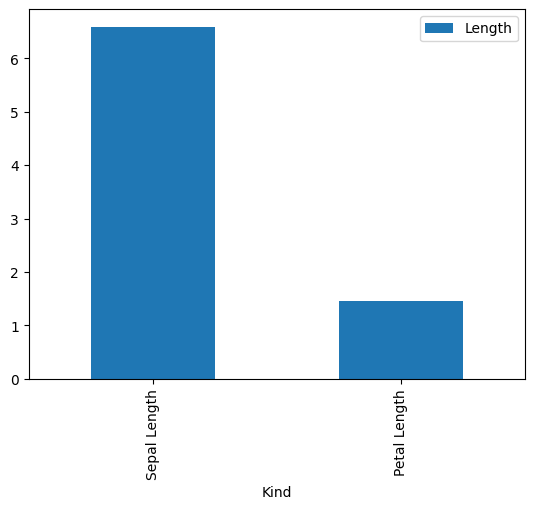

In [111]:
# code here
avg_sepal_len_of_virginica = pd.merge(virginica,sepal_all, on='Id')['SepalLengthCm'].mean()
avg_petal_len_of_setosa = pd.merge(setosa,petal_all, on='Id')['PetalLengthCm'].mean()
pd.DataFrame({'Kind':['Sepal Length', "Petal Length"], "Length": [avg_sepal_len_of_virginica, avg_petal_len_of_setosa]}).plot(x='Kind',kind='bar')

### `Q-10:` Create the complete dataset by uisng the below datasets:
- virginica
- versicolor
- setosa
- sepal all
- petal all

This dataset should have these below column names in order:
1. Id
2. Species
3. SepalLengthCm
4. SepalWidthCm
5. PetalLengthCm
6. PetalWidthCm

Also, the dataset should be shuffled means the `Id` column should not be in increasing or decreasing order. So, make a dataset which has the shuffled Id column. You can use `DataFrame.sample()` method to shuffle.

In [128]:
# code here
'''print(virginica.columns)
print(versicolor.columns)
print(setosa.columns)
print(sepal_all.columns)
print(petal_all.columns)'''

sepal_virg = pd.merge(virginica,sepal_all, on='Id').drop(columns=['Unnamed: 0_x','Unnamed: 0_y'])
v = pd.merge(sepal_virg,petal_all, on='Id').drop(columns=['Unnamed: 0'])

sepal_setosa = pd.merge(setosa,sepal_all,on='Id').drop(columns=['Unnamed: 0_x','Unnamed: 0_y'])
s = pd.merge(sepal_setosa,petal_all,on='Id').drop(columns = 'Unnamed: 0')

sepal_versi = pd.merge(versicolor,sepal_all,on='Id').drop(columns=['Unnamed: 0_x','Unnamed: 0_y'])
ver = pd.merge(sepal_versi,petal_all,on='Id').drop(columns = 'Unnamed: 0')

pd.concat([v,s, ver])

,Id,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,101,Iris-virginica,6.3,3.3,6.0,2.5
1,102,Iris-virginica,5.8,2.7,5.1,1.9
2,103,Iris-virginica,7.1,3.0,5.9,2.1
3,104,Iris-virginica,6.3,2.9,5.6,1.8
4,105,Iris-virginica,6.5,3.0,5.8,2.2
...,...,...,...,...,...,...
45,96,Iris-versicolor,5.7,3.0,4.2,1.2
46,97,Iris-versicolor,5.7,2.9,4.2,1.3
47,98,Iris-versicolor,6.2,2.9,4.3,1.3
48,99,Iris-versicolor,5.1,2.5,3.0,1.1


### `Q-11:` Find out the maximum and minimum sepal width and petal width of Setosa and Versicolor. To do this:
- First create a dataset with merging the required datasets
- After that, use `groupby` to create groups based on the "Species" column.
- Then find out which are asked in this question.


The output should be like this:
```bash
Minimum Sepal width of Setosa is 2.3
Maximum Sepal width of Setosa is 4.4

**************************************************

Minimum Sepal width of Versicolor is 2.0
Maximum Sepal width of Versicolor is 3.4

**************************************************
```

In [ ]:
# code here